### Detect Data Drift
**Description**: Data drift can occur when the statistical properties of your data change over time. Learn to detect data drift using visualizations.

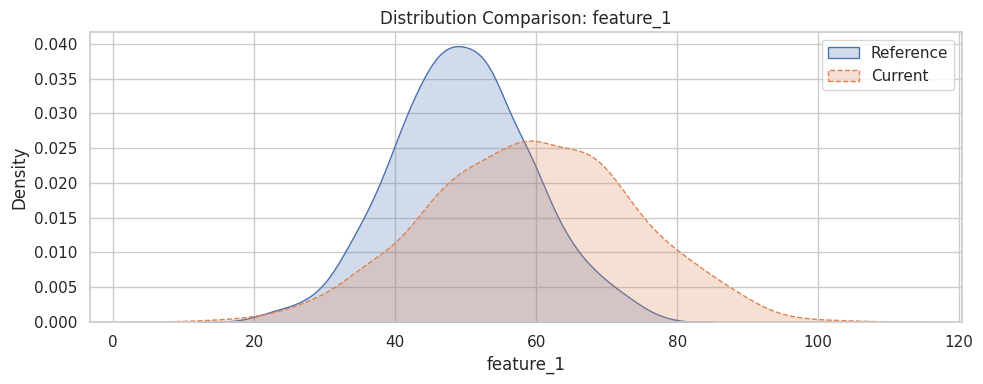

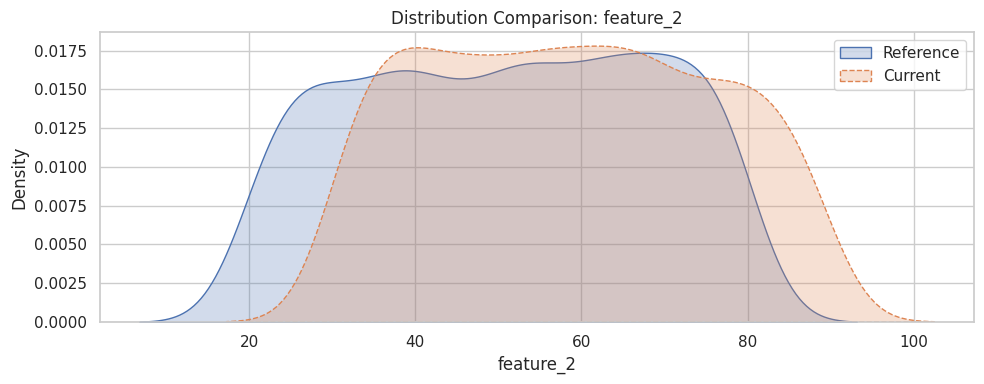


Drift Detection Summary (KS Test):
feature_1: p-value=0.0000 → Drift Detected
feature_2: p-value=0.0000 → Drift Detected


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Set style for visualizations
sns.set(style="whitegrid")

# Simulate reference dataset (e.g., last month's data)
np.random.seed(0)
ref_data = pd.DataFrame({
    'feature_1': np.random.normal(loc=50, scale=10, size=1000),
    'feature_2': np.random.uniform(20, 80, size=1000)
})

# Simulate current dataset with drift (e.g., this month's data)
current_data = pd.DataFrame({
    'feature_1': np.random.normal(loc=60, scale=15, size=1000),  # Drifted mean and std
    'feature_2': np.random.uniform(30, 90, size=1000)             # Shifted range
})

# --- Drift Detection Using Visualization ---
for feature in ref_data.columns:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(ref_data[feature], label='Reference', fill=True)
    sns.kdeplot(current_data[feature], label='Current', fill=True, linestyle='--')
    plt.title(f'Distribution Comparison: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Drift Detection Using KS Test (Statistical Test) ---
print("\nDrift Detection Summary (KS Test):")
for feature in ref_data.columns:
    stat, p_value = ks_2samp(ref_data[feature], current_data[feature])
    drift = "Drift Detected" if p_value < 0.05 else "No Significant Drift"
    print(f"{feature}: p-value={p_value:.4f} → {drift}")
